In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Datos

In [2]:
# Cargar los datos
train_features = pd.read_csv("dengue_features_train.csv")
train_labels = pd.read_csv("dengue_labels_train.csv")

In [27]:
# Aplicar interpolación lineal a los valores faltantes
#train_features.iloc[:, 4:] = train_features.iloc[:, 4:].interpolate(method='linear')

# Mantener los valores faltantes como NaN sin interpolar (solo para columnas numéricas)
train_features.iloc[:, 4:] = train_features.iloc[:, 4:].apply(pd.to_numeric, errors="coerce")

# Unir datos de entrenamiento con etiquetas
train_data = train_features.merge(train_labels, on=["city", "year", "weekofyear"], how="left")

# Eliminar columnas no numéricas irrelevantes
train_data = train_data.drop(columns=["week_start_date"])

# Separar datos por ciudad
train_sj = train_data[train_data["city"] == "sj"].drop(columns=["city"])
train_iq = train_data[train_data["city"] == "iq"].drop(columns=["city"])

Correlaciones

C:\Users\DevRoger\AppData\Local\Temp\ipykernel_14200\3990327060.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_correlated_sj.values, y=top_correlated_sj.index, palette="magma", ax=axes[0])
C:\Users\DevRoger\AppData\Local\Temp\ipykernel_14200\3990327060.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_correlated_iq.values, y=top_correlated_iq.index, palette="coolwarm", ax=axes[1])


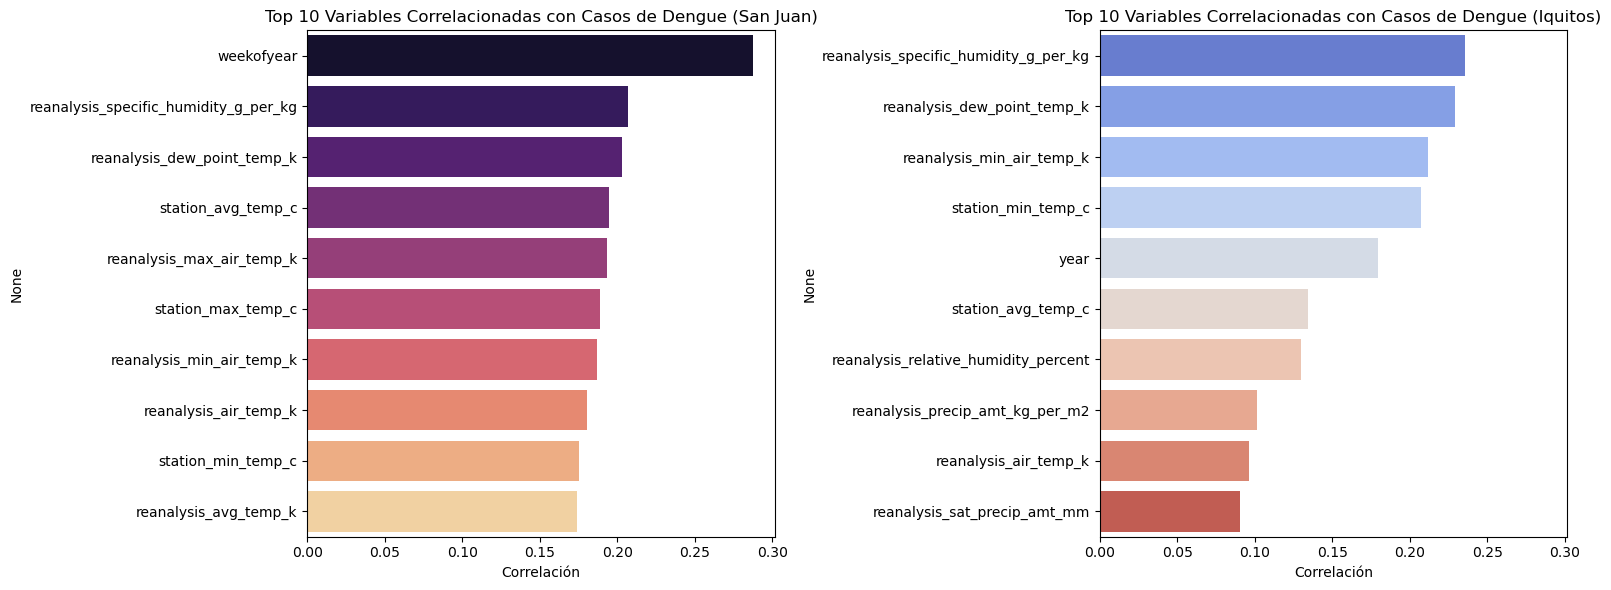

In [32]:
# Calcular correlaciones por ciudad (solo columnas numéricas)
correlation_sj = train_sj.corr(numeric_only=True)["total_cases"].sort_values(ascending=False)
correlation_iq = train_iq.corr(numeric_only=True)["total_cases"].sort_values(ascending=False)

# Seleccionar las 10 variables más correlacionadas en cada ciudad
top_correlated_sj = correlation_sj[1:11]
top_correlated_iq = correlation_iq[1:11]

# Graficar correlaciones por ciudad
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharex=True)

sns.barplot(x=top_correlated_sj.values, y=top_correlated_sj.index, palette="magma", ax=axes[0])
axes[0].set_title("Top 10 Variables Correlacionadas con Casos de Dengue (San Juan)")
axes[0].set_xlabel("Correlación")

sns.barplot(x=top_correlated_iq.values, y=top_correlated_iq.index, palette="coolwarm", ax=axes[1])
axes[1].set_title("Top 10 Variables Correlacionadas con Casos de Dengue (Iquitos)")
axes[1].set_xlabel("Correlación")

plt.tight_layout()
plt.show()

Gráficos de tendencias

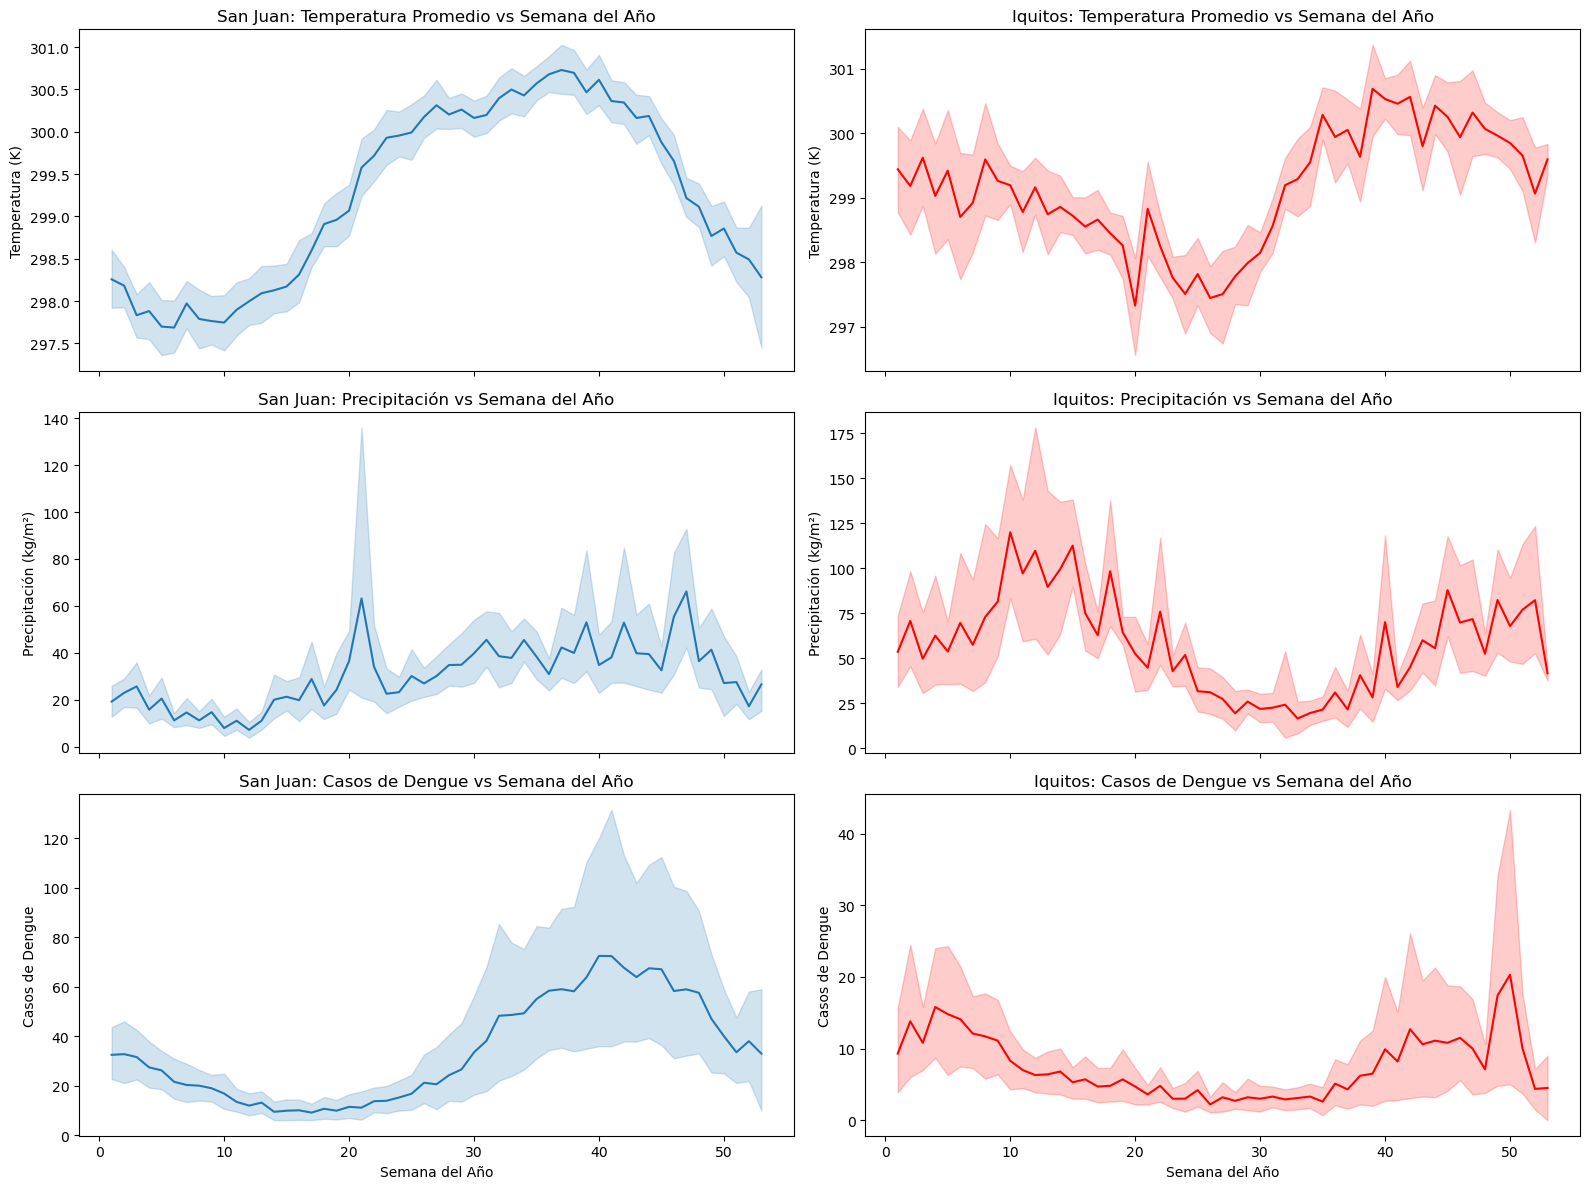

In [25]:
# Graficar tendencias temporales separadas por ciudad
fig, axes = plt.subplots(3, 2, figsize=(16, 12), sharex=True)

# San Juan
sns.lineplot(data=train_sj, x="weekofyear", y="reanalysis_avg_temp_k", ax=axes[0, 0])
axes[0, 0].set_title("San Juan: Temperatura Promedio vs Semana del Año")
axes[0, 0].set_ylabel("Temperatura (K)")

sns.lineplot(data=train_sj, x="weekofyear", y="reanalysis_precip_amt_kg_per_m2", ax=axes[1, 0])
axes[1, 0].set_title("San Juan: Precipitación vs Semana del Año")
axes[1, 0].set_ylabel("Precipitación (kg/m²)")

sns.lineplot(data=train_sj, x="weekofyear", y="total_cases", ax=axes[2, 0])
axes[2, 0].set_title("San Juan: Casos de Dengue vs Semana del Año")
axes[2, 0].set_ylabel("Casos de Dengue")
axes[2, 0].set_xlabel("Semana del Año")

# Iquitos
sns.lineplot(data=train_iq, x="weekofyear", y="reanalysis_avg_temp_k", ax=axes[0, 1], color="red")
axes[0, 1].set_title("Iquitos: Temperatura Promedio vs Semana del Año")
axes[0, 1].set_ylabel("Temperatura (K)")

sns.lineplot(data=train_iq, x="weekofyear", y="reanalysis_precip_amt_kg_per_m2", ax=axes[1, 1], color="red")
axes[1, 1].set_title("Iquitos: Precipitación vs Semana del Año")
axes[1, 1].set_ylabel("Precipitación (kg/m²)")

sns.lineplot(data=train_iq, x="weekofyear", y="total_cases", ax=axes[2, 1], color="red")
axes[2, 1].set_title("Iquitos: Casos de Dengue vs Semana del Año")
axes[2, 1].set_ylabel("Casos de Dengue")
axes[2, 1].set_xlabel("Semana del Año")

plt.tight_layout()
plt.show()


Guardar los datos

In [ ]:
# Interpolación
train_sj.to_csv("analisis/train_sj_clean.csv", index=False)
train_iq.to_csv("analisis/train_iq_clean.csv", index=False)


In [ ]:
# Nan
train_sj.to_csv("analisis/train_sj_clean2.csv", index=False)
train_iq.to_csv("analisis/train_iq_clean2.csv", index=False)
